In [1]:
import os
import skimage.io as io
import matplotlib.pyplot as plt
import random
from PIL import Image

import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np
from improved_unet import *
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow_addons.layers import InstanceNormalization
from keras.models import Model, model_from_json
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.models import load_model

Using TensorFlow backend.


In [2]:
import cv2
import glob

# Load data

In [3]:
images = []
for img in glob.glob("ISIC2018_Task1-2_Training_Data\ISIC2018_Task1-2_Training_Input_x2/*.jpg"):
    n= cv2.imread(img,1)
    images.append(n)

In [4]:
masks = []
for img in glob.glob("ISIC2018_Task1-2_Training_Data\ISIC2018_Task1_Training_GroundTruth_x2/*.png"):
    m= cv2.imread(img,0)
    masks.append(m)

Resize image to 256x256 and create two array for preparation of dataset spliting.

In [5]:
image_size = (256,256)

In [6]:
for i in range(len(images)):
    images[i] = cv2.resize(images[i],image_size,interpolation = cv2.INTER_CUBIC)
    images[i] = images[i]/255
for i in range(len(masks)):
    masks[i] = cv2.resize(masks[i],image_size,interpolation = cv2.INTER_CUBIC)
    masks[i] = np.round(masks[i]/255,0)

In [7]:
X = np.zeros([2594, 256, 256, 3])
y = np.zeros([2594, 256, 256])

In [8]:
for i in range(len(images)):
    X[i] = images[i]
    
for i in range(len(masks)):
    y[i] = masks[i]
        
y = y[:, :, :, np.newaxis]

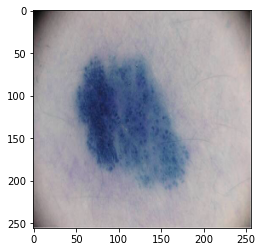

In [9]:
plt.imshow(X[7])

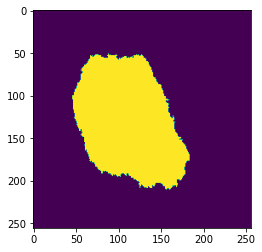

In [10]:
plt.imshow(y[7])

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.7, random_state=7)
X_test, X_val, Y_test, Y_val = train_test_split(X_train, Y_train, test_size=0.3, random_state=7)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(Y_val.shape)
print(X_val.shape)

(1815, 256, 256, 3)
(1270, 256, 256, 3)
(545, 256, 256, 1)
(545, 256, 256, 3)
